In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_train = pd.read_csv('train.csv')
app_test = pd.read_csv('test.csv')
app_train.head(2)

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1


In [3]:
X = app_train.drop('Attrition', axis = 1)
y = app_train[['Attrition']]

In [4]:
print(y.shape, X.shape)

(1628, 1) (1628, 28)


Check Missing Values

In [5]:
print(X.isnull().sum().sum(), y.isnull().sum().sum(), app_test.isnull().sum().sum())

0 0 0


Categeorical Encoding

In [6]:
object_cols = [col for col in X.columns if X[col].dtype == "object"]
object_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [7]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_X = X.copy()
label_test = app_test.copy()
# Apply label encoder 
label_encoder = LabelEncoder() # Your code here
for col in object_cols:
    label_X[col] = label_encoder.fit_transform(label_X[col]) 
    label_test[col] = label_test[col] = label_encoder.fit_transform(label_test[col]) 

In [10]:
label_test.head(2)

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,2,1,9,3,3,377,4,1,...,4,1,5,3,5,2,0,4,5,1
1,2,31,2,2,6,4,3,653,1,1,...,4,2,13,4,7,7,5,7,3,1


EDA and Feature Engg.

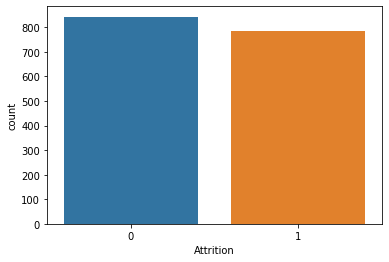

In [11]:
#observing the target Var
plt.figure(facecolor = 'w')
sns.countplot(y['Attrition'])

In [12]:
#Skewness
for x in label_X.columns:
    print(x, label_X[x].skew())

Id 0.0
Age 0.4315411626027897
BusinessTravel -1.3243380164568697
Department -0.02956907073468805
DistanceFromHome 0.8685624445084181
Education -0.31648867091964994
EducationField 0.5012635596697925
EmployeeNumber 0.08723216791494379
EnvironmentSatisfaction -0.23716235179631376
Gender -0.45921240432167826
JobInvolvement -0.5095372870709844
JobRole -0.3973066542462736
JobSatisfaction -0.2482973395840124
MaritalStatus -0.32124886316610207
MonthlyIncome 1.5613325016924169
NumCompaniesWorked 0.9859588452411379
OverTime 0.46985467619789956
PercentSalaryHike 0.8311232245655272
PerformanceRating 1.9040646173013036
StockOptionLevel 1.208191341038485
TotalWorkingYears 1.169746211210671
TrainingTimesLastYear 0.4665967456330034
YearsAtCompany 1.9430814670385648
YearsInCurrentRole 1.1155568718206854
YearsSinceLastPromotion 2.071732247680894
YearsWithCurrManager 1.01504875135989
CommunicationSkill -0.10698685461546385
Behaviour 0


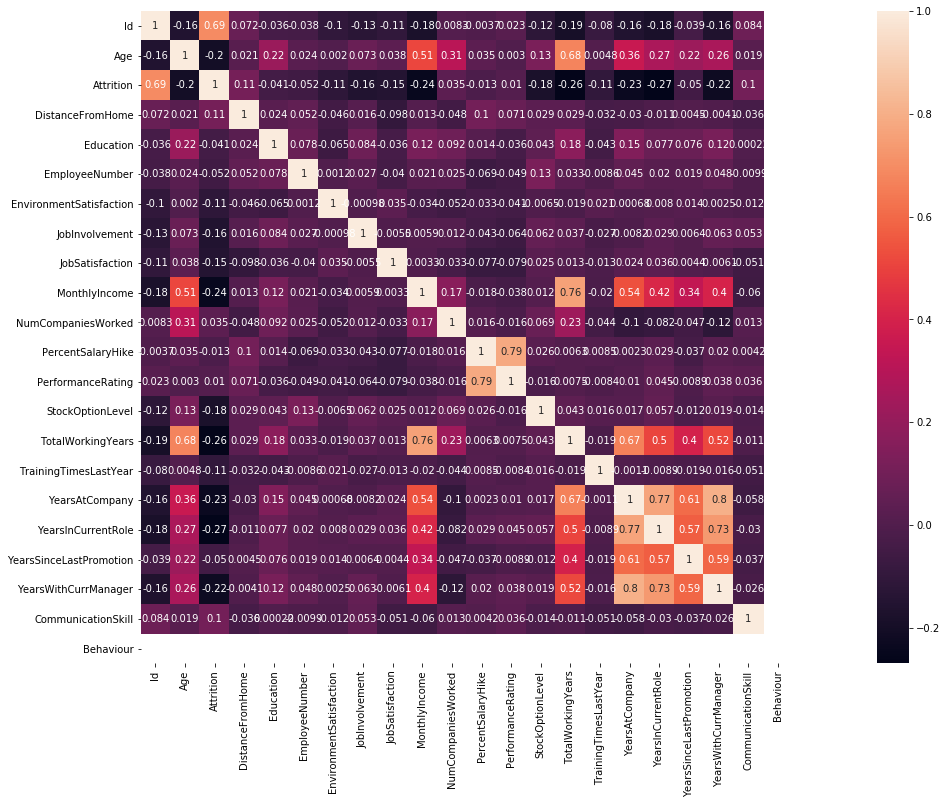

In [13]:
#Correlation between all the features
plt.figure(facecolor = 'w')
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(app_train.corr(), square=True, annot=True, cbar=True)

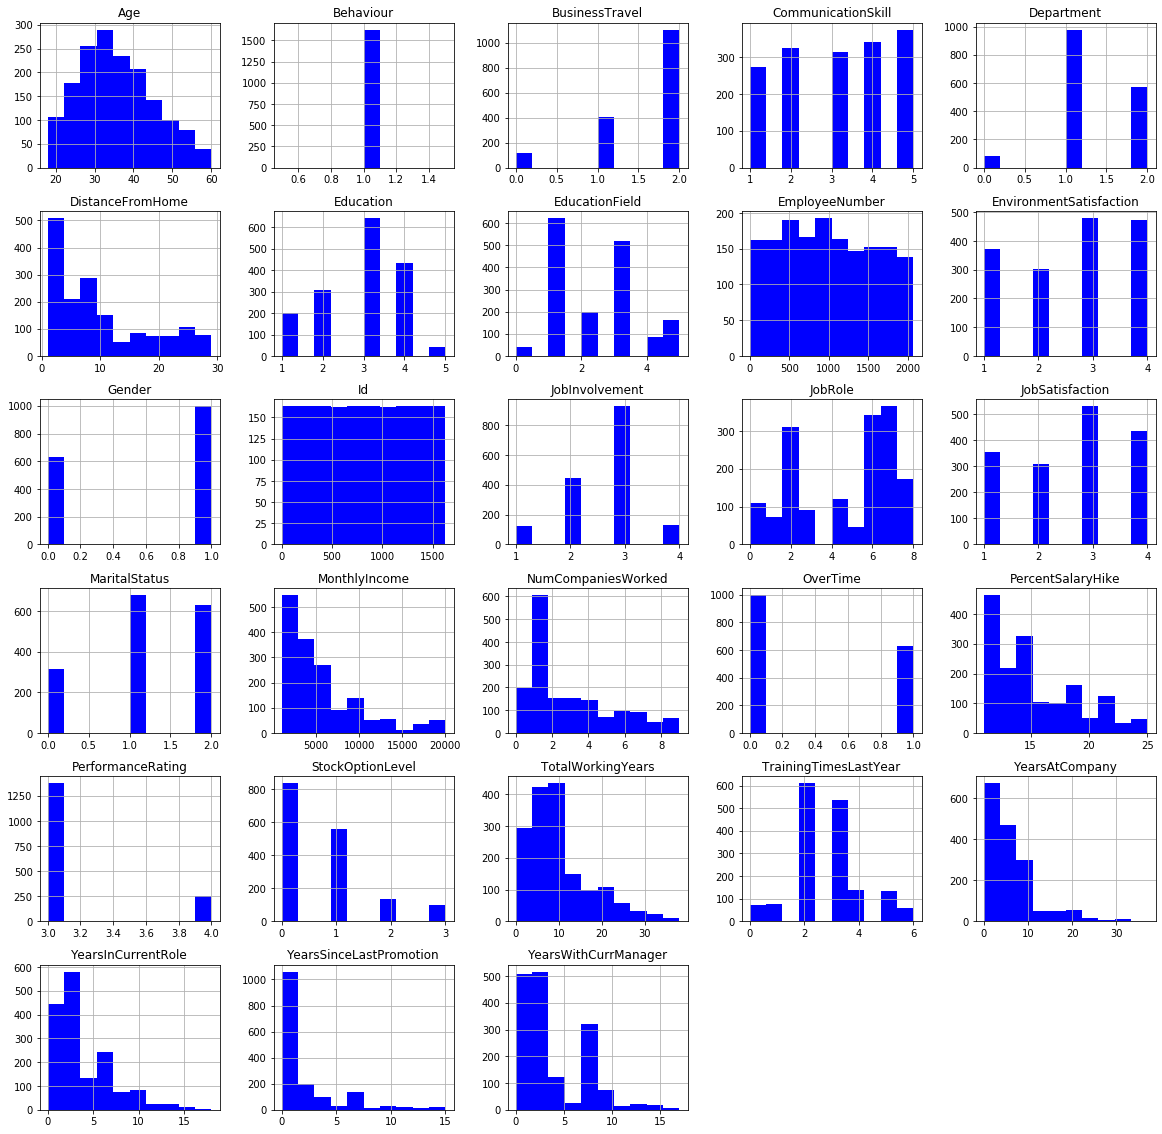

In [14]:
label_X.hist(figsize = (20,20), facecolor = 'b')
plt.show()

/home/manan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/manan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/manan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created th

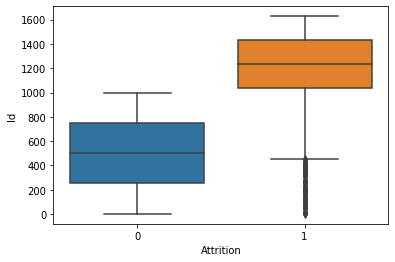

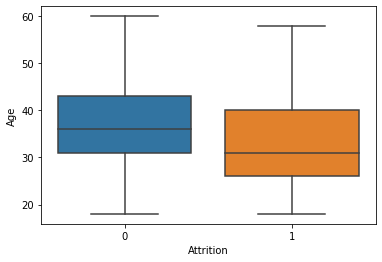

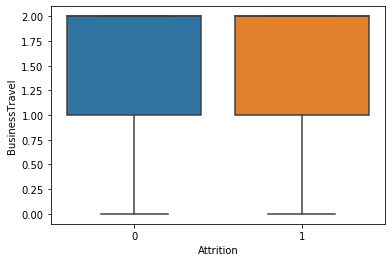

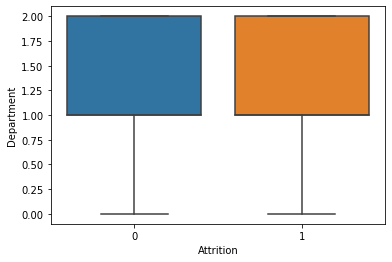

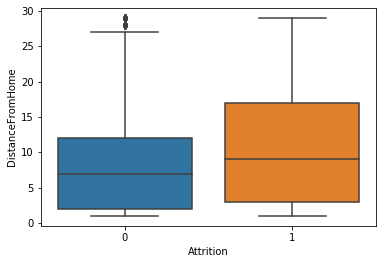

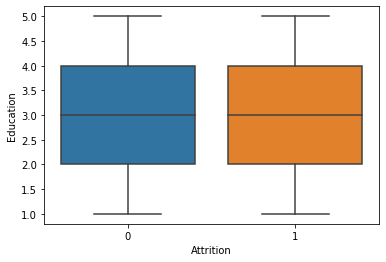

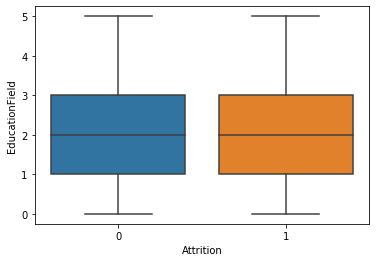

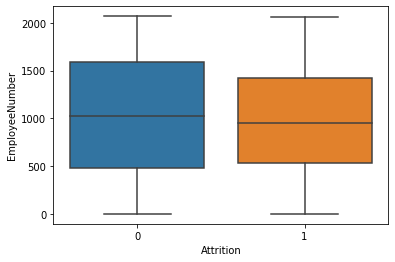

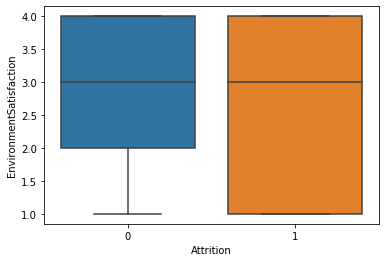

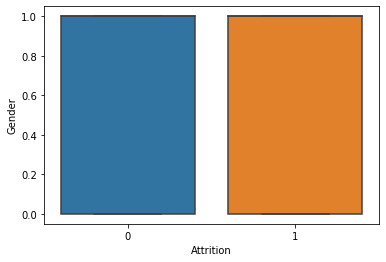

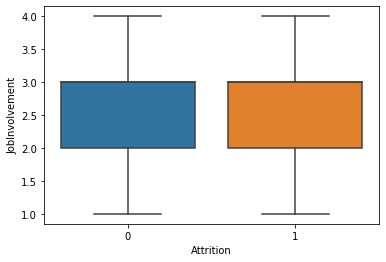

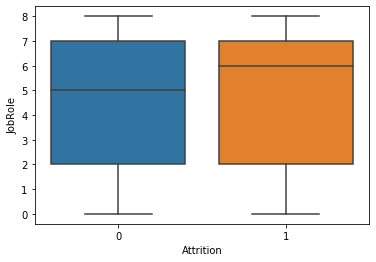

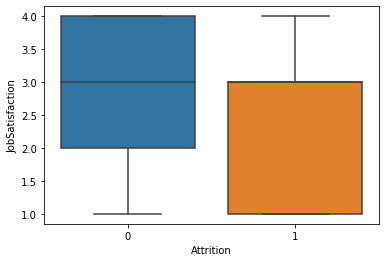

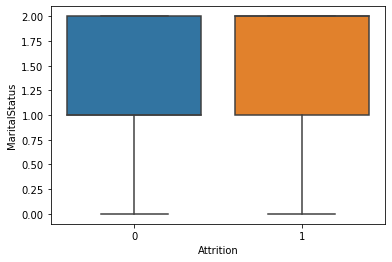

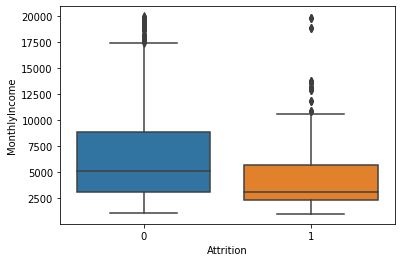

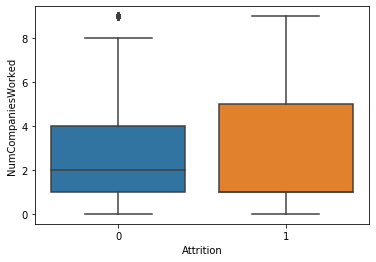

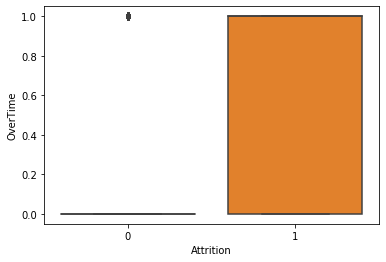

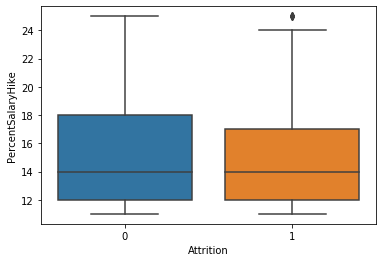

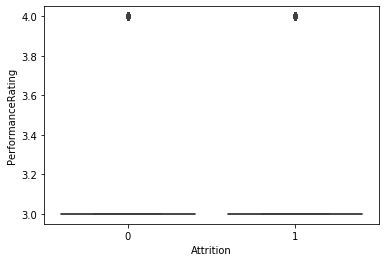

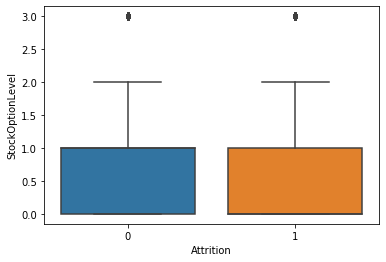

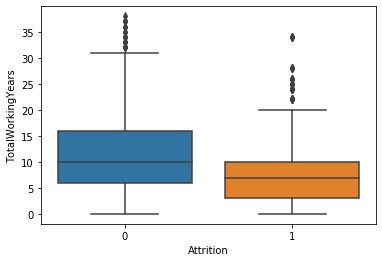

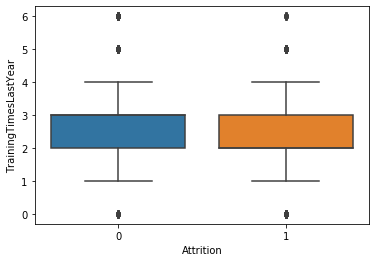

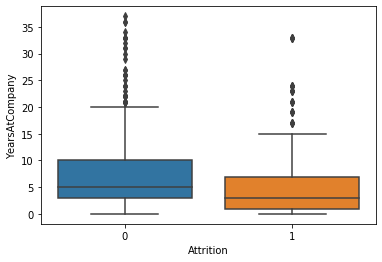

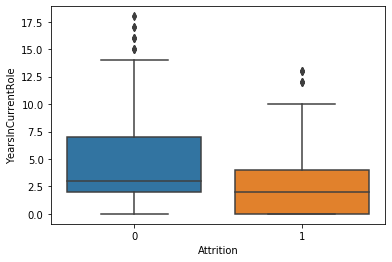

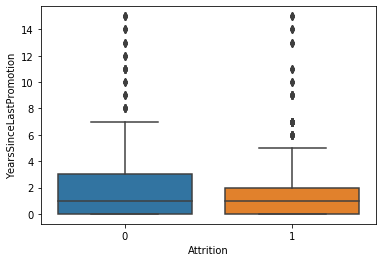

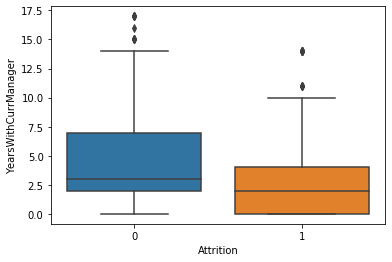

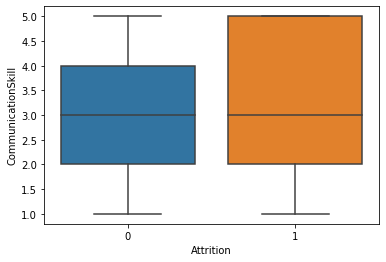

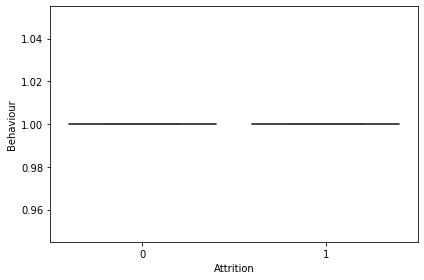

In [15]:
import matplotlib.gridspec as gridspec
def outlier_analysis(feature,data):
    fig=plt.figure(facecolor = 'w')
    sns.boxplot(x = app_train['Attrition'],y=feature,data=label_X)
    
for i in label_X.columns:
    outlier_analysis(i,label_X)
pass
plt.tight_layout() 
plt.show()
pass

Id,monthly Income,Totalworkingyears,YearatCompany,yearsSinceLastPromotion have considerable outliers

Model Training

In [26]:
from sklearn.preprocessing import MinMaxScaler
features = list(label_X.columns)

# Scale each feature to 0-1
test = label_test.copy()

scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(label_X)

train = scaler.transform(label_X)
test = scaler.transform(label_test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (1628, 28)
Testing data shape:  (470, 28)


Using Random Forest - AUC ~ 81%

In [27]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100)

In [28]:
random_forest.fit(train, y)

feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

predictions1 = random_forest.predict_proba(test)[:, 1]
#random_forest.score(test, predictions)

/home/manan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [29]:
submit = app_test[['Id']]
submit['Attrition'] = predictions1

submit.to_csv('RFC_fil.csv', index = False)

/home/manan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Improved Model - Gradient Boost - AUC ~ 82%

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
GBA = GradientBoostingClassifier()
GBA.fit(train, y)
predictions2 = GBA.predict_proba(test)[:, 1]

/home/manan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
submit = app_test[['Id']]
submit['Attrition'] = predictions2

submit.to_csv('GB_fil.csv', index = False)

/home/manan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Improved Model - XGBoost - AUC ~ 84%

In [33]:
import xgboost as xgb

In [34]:
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
                           subsample=0.6)
xgb_model.fit(train, y)
predictions3 = xgb_model.predict_proba(test)[:, 1]

/home/manan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
submit = app_test[['Id']]
submit['Attrition'] = predictions3

submit.to_csv('xgb_fil.csv', index = False)

/home/manan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Confusion Matrix